# Урок 4

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### 1. Задание (на листочке)

Решите уравнение sin(x)/x=0.

При `x ≠ 0` корни такие же как у `sin(x)=0`

Предел `sin(x)/x` при `x→0` равен 1.

**Ответ:** корни `x=π·N`, где `N = ±1,±2,±3,±4 ...` (целые, кроме нуля)

### 2. Задание (на листочке)

Даны три прямые 
* y=k1*x+b1, 
* y=k2*x+b2,
* y=k3*x+b3. 

Как узнать, пересекаются они в одной точке или нет?

**Ответ:** Должны одновременно выполняться условия:
* коэффициенты k не должны быть равны между собой (иначе прямые с равными k будут паралельны)
* коэффициенты k не должны быть равны между собой И коэффициенты b не должны быть равны между собой (иначе прямые будут совпадать)
* выражение (b_i-b_j)/(k_j-k_i) при любых i,j = 1,2,3 и i ≠ j **дает одинаковый результат**

### 3. Задание (в программе или на листочке)
На листе тетради «в линейку» (расстояние между линиями равно а) лежит игла (длиной b). Координаты нижней точки иглы (х,у), игла лежит под углом alfa. Пересекает ли игла линию или нет?


Игла пересекает линию, если хотя бы для одного `n` (где n = 0,1,2...N) выполняется неравенство `x <= a*n <= b*sin(alfa)` (1), иначе не пересекает. Так же есть более быстрая првоерка: игла пересекает линию, если `a < b*sin(alfa)` (2), но это условие определяет не все возможные случаи пересечения линии иглой. Однако на практике этот факт может быть полезен тем, что выражение `b*sin(alfa)` в любом случае необходимо рассчитывать, чтобы применить неравенство (1), но зато если неравенство (2) на промежуточном этапе даст истинный результат, то задача считается решенной, и не нужно проводить N циклов сравнений из неравенства (1) (N циклов в наихудшем случае, когда игла пересекает линию с порядковым номером N).

In [2]:
def cros(a=1, b=2, alfa=np.pi/4, x=1.3, N=10):
    dx = b*np.sin(alfa)
    if dx>a:
        return True
    for i in range(N):
        if x <= a <= x+dx:
            return True
        else:
            return False
print('(a=1, b=2, x=1.3, N=10):')      
print('alfa 45 градусов. Пересечение:',cros())
print('alfa 30 градусов. Пересечение:',cros(alfa=np.pi/6))

(a=1, b=2, x=1.3, N=10):
alfa 45 градусов. Пересечение: True
alfa 30 градусов. Пересечение: False


### 4. Задание** (задание делать по желанию)
Решите аналитически и потом численно (в программе) уравнение, зависящее от параметра а: 
sin(а*x)=0
при условии: 0.01<a<0.02, 100<х<500.
Т.е. надо найти решение х как функцию параметра а - построить график x=x(а).
Если численным методом не получается найти все ветви решения x(а), то отыщите хотя бы одну.


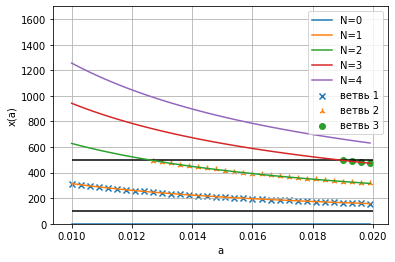

In [3]:
a = np.arange(0.01,0.02,0.0001)
N=np.array(range(5))
for n in N:
    plt.plot(a,np.pi*n/a,label=f'N={n}')
    
plt.hlines((100,500),xmin=0.01, xmax=0.02,color='black')



from scipy.optimize import fsolve
from functools import partial

def func(x,a):
    return np.sin(a*x)

# функция с помощью численного метода расчитывает точки и отображает на графике
def ch_metod(f, start_x, m='x',lab=''):
    x_a = np.array([])
    A = np.arange(0.01,0.02,0.0003)
    start = start_x
    for a in A:
        start = fsolve(partial(f,a),start)[0]
        x_a = np.append(x_a, start)
    A = A[x_a<500]
    x_a = x_a[x_a<500]
    plt.scatter(A,x_a,marker=m,label=lab)


ch_metod(func, 200,lab='ветвь 1') 
ch_metod(func, 500, m='2',lab='ветвь 2')
ch_metod(func, 900, m='o',lab='ветвь 3')


plt.ylabel('x(a)')
plt.xlabel('a')
plt.ylim(0,1700)
plt.legend()
plt.grid(True)
plt.show()

`x(a)=πN/a`, где `N` - целое.

Видно, что в заданном интервале `x`, имеется три ветви решения `x(a)`.

Границы интервалов `a`, в которых наблюдается разное количество ветвей решений `x(a)` можно посчитать аналитически, используя график как подсказку. Первая граничная точка - пересечение `x=500` и `x(a) при N=2`, вторая `x=500` и `x(a) при N=3`.

Решение:
* при `(0.01 < a <= π/250]` `x = π/a`

* при `(π/250 < a <= 3π/500]` `x1 = π/a`, `x2 = 2π/a`

* при `(3π/500 < a < 0.02)` `x1 = π/a`, `x2 = 2π/a`, `x3 = 3π/a`

Так же эти ветви были рассчитаны с применением численного метода.

### 17.6.2

In [4]:
k1 = 3/4
k2 = -1/7
alpha = np.arctan(abs((k1-k2)/(1+k1*k2)))
print(alpha*180/np.pi,'градусов')

45.0 градусов


### 17.6.4
0 градусов
### 17.6.5
парабола
### 17.6.6
эллипс
### 17.6.7
гипербола
### 17.6.8
гипербола